<a href="https://colab.research.google.com/github/dhineshkumar1998/Finacial_dashboard_dhineshkumarR/blob/main/data_wrangling%2Ccleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/titanic3.xls")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

In [ ]:
df ["age"] = pd.to_numeric(df["age"], errors="coerce")

In [ ]:
df.dtypes

In [ ]:
df.drop(columns=["ticket"], inplace=True)

In [ ]:
df.head()

In [ ]:
df["sex"] = df["sex"].str.lower()

In [ ]:
df.head()

In [ ]:
df["sex"].value_counts()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.boxplot(df["fare"])
plt.title("fare")
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
import seaborn as sns

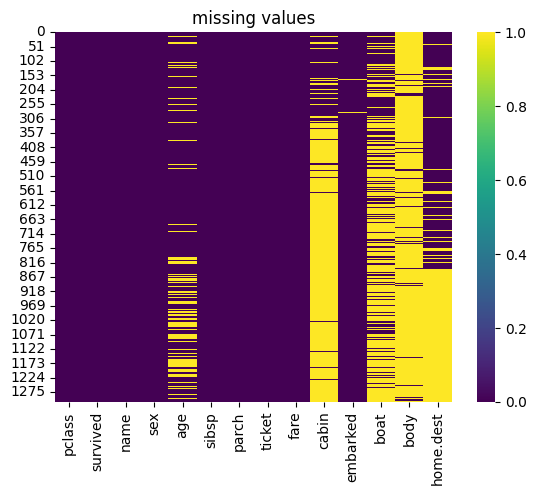

In [ ]:
sns.heatmap(df.isnull(), cbar = "true", cmap = "viridis")
plt.title("missing values")
plt.show()

In [ ]:
missing_percentage = df.isnull().sum()/len(df)*100

In [ ]:
missing_percentage

In [ ]:
df.drop(columns=["cabin"],inplace = True)

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [ ]:
df.fillna(df["age"].median(),inplace = True)

In [ ]:
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [ ]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]

In [ ]:
num_columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()
df['sex'] = ls.fit_transform(df['sex'])

In [ ]:
df = pd.get_dummies(df, columns = ["embarked"],drop_first = True)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
q1 = df["fare"].quantile(0.25)
q3 = df["fare"].quantile(0.75)
iqr = q3-q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
outliers = df[(df["fare"] < lower) | (df["fare"] > upper)]

In [ ]:
outliers

In [ ]:
df["fare"] = df["fare"].apply(lambda x: df["fare"].median() if x > upper or x < lower else x)

In [ ]:
df["fare"]

In [ ]:
plt.boxplot(df["fare"])
plt.title("outliers fare")
plt.show

In [ ]:
sns.countplot(data = df, x = "sex")
plt.title("gender distribution")
plt.show


In [ ]:
sns.histplot(df["age"], bins=20, kde=True)
plt.title("age distribution")
plt.show()

In [ ]:
sns.boxplot(data = df, x = "sex", y = "sex")
plt.title("age distribution by sex")
plt.show()

In [ ]:
sns.barplot(data = df , x= "sex", y = "survived")
plt.title("survival rate")
plt.show()

In [ ]:
sns.histplot(df[df["survived"]==1]["fare"], bins = 20, kde = True , color = "green",label = "survived")
sns.histplot(df[df["survived"]==0]["fare"], bins = 20, kde = True , color = "red",label = "not survived")
plt.title("fare distribution by survival")
plt.legend()
plt.show()

In [ ]:
# Plot the correlation matrix
sns.heatmap(correlation, annot=True, cmap="Coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x = df.drop(columns =["survivded"])
y = df["survived"]
x=x.fillna(x.radian())

smote = smote(random_state = 69)
x_resampled, y_resampled = smote.fit_resample(x,y)